<h1>Questions to be handed in  on limits</h1>

<p>To get started, we load the <code>MTH229</code> package so that we can make plots and use some symbolic math:</p>

In [1]:
# load MTH229 package one way or the other
using Pkg
if haskey(Pkg.installed(), "MTH229")
    using MTH229
else
    try
        Pkg.add(PackageSpec(url="https://github.com/mth229/MTH229.jl", rev="master"))
        using MTH229
    catch err
        include(download("https://raw.githubusercontent.com/mth229/MTH229.jl/master/src/229.jl"))
    end
end

In [1]:
using SymPy

<hr />

<h3>Quick background</h3>

<p>Read about this material here: <a href="http://mth229.github.io/limits.html">Investigating limits with Julia</a>.</p>

<p>For the impatient, the expression</p>


$$
\lim_{x \rightarrow c} f(x) = L
$$


<p>says that the limit as $x$ goes to $c$ of $f$ is $L$. Intuitively, as $x$ gets "close" to $c$, $f(x)$ should be close to $L$.</p>

<p>If $f(x)$ is <em>continuous</em> at $x=c$, then $L=f(c)$. This is almost always the case for a randomly chosen $c$ - but almost never the case for a textbook choice of $c$. Invariably with text book examples–-though not always–-we will have <code>f&#40;c&#41; &#61; NaN</code> indicating the function is indeterminate at <code>c</code>. For such cases we need to do more work to identify if any such $L$ exists and when it does, what its value is.</p>

<p>In this project, we investigate limits three ways: graphically, with a table of numbers, and analytically.</p>

<h4>Graphical approach</h4>

<p>The graphical approach is to plot the expression <em>near</em> $c$ and look visually what $f(x)$ goes to as $x$ gets close to $c$.</p>

<p>For example, what is this limit?</p>


$$
\lim_{x \rightarrow \pi/2} \frac{1 - \sin(x)}{(\pi/2 - x)^2}?
$$


<p>Here is a graph to investigate the problem. We simply graph near $c$ and look:</p>

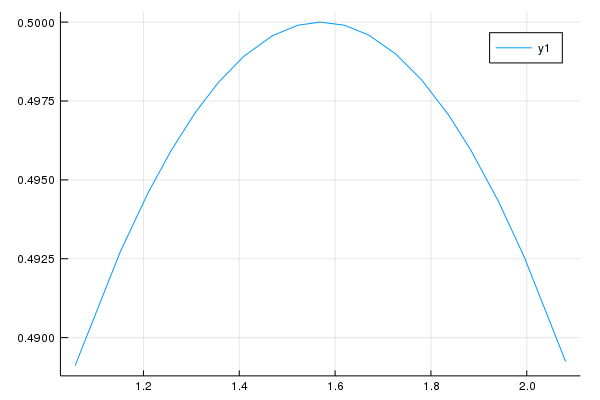

In [1]:
f(x) = (1-sin(x)) / (pi/2 - x)^2
c = pi/2
plot(f, c - pi/6, c + pi/6)

<p>From the graph, we see clearly that as $x$ is close to $c=\pi/2$, $f(x)$ is close to $1/2$. (The fact that <code>f&#40;pi/2&#41; &#61; NaN</code> will either not come up, as <code>pi/2</code> is not among the points sampled or the <code>NaN</code> values will not be plotted.)</p>

<h2>Questions: Graphical approach</h2>

<ul>
<li><p>Plot the function to estimate the limit. What is the value?</p>
</li>
</ul>


$$
\lim_{\theta \rightarrow 0} \frac{\sin(5\theta)}{\sin(2\theta)}.
$$


<ul>
<li><p>Plot a function to estimate the limit. What is the value?</p>
</li>
</ul>


$$
\lim_{x \rightarrow 0} \frac{2^x - \cos(x)}{x}.
$$


<ul>
<li><p>Plot the function to estimate the limit. What is the value?</p>
</li>
</ul>


$$
\lim_{\theta \rightarrow 0} \frac{\sin^2(4\theta)}{\cos(\theta) - 1}.
$$


<ul>
<li><p>The following expressions are all <em>indeterminate</em> at $x=0$. But <code>Julia</code> does not compute <code>NaN</code> for all of them. Which is <strong>not</strong> <code>NaN</code>?</p>
</li>
</ul>

&#10054; $(1-\cos(x))/x$
&#10054; $x^{1/\log(x)}$
&#10054; $x \cdot \log(x)$



<ul>
<li><p>This expression is mathematically indeterminate  at $\pi/2$ of the type $0/0$.</p>
</li>
</ul>


$$
\frac{\cos(x)}{\pi/2 - x}
$$


<p>What value does <code>Julia</code> return?</p>

<h2>Using tables to investigate limits</h2>

<p>Investigating a limit numerically requires us to operationalize the idea of $x$ getting close to $c$ and $f(x)$ getting close to $L$. Here we do this manually:</p>

In [1]:
f(x) = sin(x)/x
f(0.1), f(0.01), f(0.001), f(0.0001), f(0.00001), f(0.000001)

(0.9983341664682815, 0.9999833334166665, 0.9999998333333416, 0.9999999983333334, 0.9999999999833332, 0.9999999999998334)

<p>From this we see a <em>right</em> limit at 0 appears to be $1$.</p>

<p>We can put into a column, but wrapping things in square brackets (forming a vector):</p>

In [1]:
[f(0.1), f(0.01), f(0.001), f(0.0001), f(0.00001), f(0.000001)]

6-element Array{Float64,1}:
 0.9983341664682815
 0.9999833334166665
 0.9999998333333416
 0.9999999983333334
 0.9999999999833332
 0.9999999999998334

<p>The compact printing makes it clear, the limit here should be $L=1$.</p>

<p>Limits when $c\neq 0$ are similar, but require points getting close to $c$. For example,</p>


$$
\lim_{x \rightarrow \pi/2} \frac{1 - \sin(x)}{(\pi/2 - x)^2}
$$


<p>has a limit of $1/2$. We can investigate with:</p>

In [1]:
c = pi/2
f(x) = (1 - sin(x))/(pi/2 - x)^2
[f(c+.1), f(c+.001), f(c+.00001), f(c+.0000001), f(c+.000000001)]

5-element Array{Float64,1}:
 0.49958347219742816
 0.4999999583256134 
 0.5000000413636343 
 0.49960036049791995
 0.0                

<p>Wait, is the limit $1/2$ or $0$? At first $1/2$ seems like the answer, but the last number is $0$.</p>

<p>Here we see a limitation of tables - when numbers get too small, that fact that they are represented in floating point becomes important. In this case, for numbers too close to $\pi/2$ the value on the computer for <code>sin&#40;x&#41;</code> is just 1 and not a number near 1. Hence the denominator becomes $0$, and so then the expression. (Near $1$, the floating point values are about $10^{-16}$ apart, so when two numbers are within $10^{-16}$ of each other, they can be rounded to the same number.)  So watch out when seeing what the values of $f(x)$ get close to. Here it is clear that the limit is heading towards $0.5$ until we get too close.</p>

<p>For convenience, this function from the <code>MTH229</code> package can make the above computations easier to do:</p>

In [1]:
function lim(f::Function, c::Real; n::Int=6, dir="+")
	 hs = [(1/10)^i for i in 1:n] # close to 0
	 xs = c .+ (dir=="+" ? hs : -hs)

         [xs f.(xs)]
end

<p>Its use follows the common pattern: <code>action&#40;function, arguments...&#41;</code>. For example,</p>

In [1]:
f(x) = (1 - sin(x))/(pi/2 - x)^2
lim(f, pi/2)

6×2 Array{Float64,2}:
 1.6708   0.499583
 1.5808   0.499996
 1.5718   0.5     
 1.5709   0.5     
 1.57081  0.5     
 1.5708   0.500044

<hr />

<ul>
<li><p>Find the limit using a table. Show your commands.</p>
</li>
</ul>


$$
\lim_{x \rightarrow 0+} \frac{\cos(x) - 1}{x}.
$$


<p>What is the estimated value of the limit?</p>

<ul>
<li><p>Find the limit using a table. What is the estimated value of the limit?</p>
</li>
</ul>


$$
\lim_{x \rightarrow 0+} \frac{\sin(5x)}{x}.
$$


<ul>
<li><p>Find the limit using a table. What are your commands? What is the estimated value? (You need  values getting close to $3$ not $0$.)</p>
</li>
</ul>


$$
\lim_{x \rightarrow 3} \frac{x^3 - 2x^2 -9}{x^2 - 2x -3}.
$$


<p>The commands are:</p>

<p>The value is:</p>

<ul>
<li><p>Find this limit using a table. What is the estimated value?</p>
</li>
</ul>


$$
\lim_{x \rightarrow 0} \frac{\sin^{-1}(4x)}{\sin^{-1}(5x)}
$$


<ul>
<li><p>Find the <em>left</em> limit of <code>f&#40;x&#41; &#61; cos&#40;pi/2*&#40;x - floor&#40;x&#41;&#41;&#41;</code> as $x$  goes to $2$.</p>
</li>
</ul>

<ul>
<li><p>Find the limit using a table. What is the estimated value? Recall,  <code>atan</code> and <code>asin</code> are the names for the appropriate inverse  functions.</p>
</li>
</ul>


$$
\lim_{x \rightarrow 0+} \frac{\tan^{-1}(x) - 1}{\sin^{-1}(x) - 1}.
$$


<h2>Symbolic limits</h2>

<p>The add-on package <code>SymPy</code> can be used to analytically compute the limit of a simple algebraic function of a single variable. The package is loaded when <code>MTH229</code> is.</p>

<p><code>SymPy</code> provides the <code>limit</code> function. It can be called just as our <code>lim</code> function is above. For example:</p>

In [1]:
f(x) = sin(x)/x
limit(f, 0)

<ul>
<li><p>Find this limit using <code>SymPy</code>:</p>
</li>
</ul>


$$
\lim_{x \rightarrow 3 } \frac{1/x - 1/3 }{x^2 - 9 }.
$$


<ul>
<li><p>Find this limit using <code>SymPy</code>:</p>
</li>
</ul>


$$
\lim_{x \rightarrow 0} \frac{\sin(x^2)}{x\tan(x)}.
$$


<ul>
<li><p>Find the limit using <code>SymPy</code>. What is the estimated value?</p>
</li>
</ul>


$$
\lim_{x \rightarrow 0+} \frac{x - \sin(|x|)}{x^3}.
$$


<h2>Other questions</h2>

<ul>
<li><p>Let <code>f&#40;x&#41; &#61; sin&#40;sin&#40;x&#41;^2&#41; / x^k</code>. Consider $k=1$, $2$, and $3$. For which of values of $k$ does the limit at $0$ <strong>not</strong> exist? (Repeat the problem for the 3 different values.)</p>
</li>
</ul>

&#10054; k=1,2,3
&#10054; k=2,3
&#10054; k=3
&#10054; it exists for all k



<ul>
<li><p>Compute the limit, $L=\lim_{x \rightarrow 1} (x^n-1)/(x^m-1)$, for various values of $n$ and $m$ until you can determine which of the following values for $L$ is correct:</p>
</li>
</ul>

&#10054; $L=n/m$
&#10054; $L=m/n$
&#10054; $L=n-m$
&#10054; $L=m-n$
&#10054; $L=n \cdot m$



<ul>
<li><p>Consider the the left and right limits of $f(x) = (2^{1/x} - 2^{-1/x})/ (2^{1/x} + 2^{-1/x})$ at $x=0$. What is true?</p>
</li>
</ul>

&#10054; The limit is $1$
&#10054; The left limit is $-1$, the right limit is $1$
&#10054; The left limit is $1$, the right limit is $-1$
&#10054; Because the function is not defined at $x=0$, there is not a left limit or right limit.

